# What and Where Are The Most Expensive Natural Disasters in the US?
By Elias Lopez Dalla Nora and Ivy Mahncke

### Research Question

Natural disasters are the most drastic and visible effects of the worsening global climate crisis. Understanding
the toll they take on our communities is critical in the fight to improve our climate. We focused specifically on
examining the impact of natural disasters within the United States -- a country with both significant responsibility
for the climate crisis, and significant political influence to do something about it.

We asked the following question: What kinds of natural disasters are the most costly to recover from, and which
regions in the US are most burdened by this cost?

In asking this question we were confronted with an important decision: Could we afford to only think of cost in monetary
terms, or was there more to the story? We decided to analyze not just the monetary cost of these disasters, but also the
loss of human life as a result of their impact. We felt that understanding both angles could lead to a compelling story
for all audiences -- both governments that must understand the economic burden of ignoring climate change, and individuals
who may be called to action by the loss of other people in their communities.

Another important insight we carried into this research project is the limited scope of our question. It is true that by
focusing on US states we can describe a specific situation that is relevant to our audience. However, our dataset does
not examine the cost of natural disasters in other countries, nor does it examine the impact of natural disasters in US
territories such as Puerto Rico, who are often forgotten in conversations about the US. As we take on this endeavor, it
is important to remember that the worst crises due to natural disasters often occur in the Third World, whose governments
are not significant culprits of the ongoing climate crisis. Ideally, in understanding how climate change impacts even the
richest country in the world, our audience will also be compelled to learn about other territories and countries, who are
much more often victims of these disasters.

### Methodology


In [6]:
import fetch_data as f
import process_data as p
import graph_data as g

# establish universal regions, plus a scrap bin
region_list = ["Western", "Midwestern", "Southern", "Northern"]

# request dataset from online and store it in a variable
f.write_to_csv("https://www.ncei.noaa.gov/archive/archive-management-system/OAS/bin/prd/jquery/download/209268.17.17.tar.gz","209268.17.17.tar.gz",)

disaster_data = p.read_csv_to_var(
    "./0209268/17.17/data/0-data/events-US-1980-2023.csv"
)

# modify dates to be less specific years
p.parse_all_years(disaster_data)

# universal variables
all_years = p.retrieve_unique_years(disaster_data)
all_disaster_types = p.retrieve_unique_disaster_types(disaster_data)
year_buckets = ["1980 - 1984","1985 - 1989","1990 - 1994","1995 - 1999","2000 - 2004","2005 - 2009","2010 - 2014","2015 - 2019","2020 - 2023"] # TO FILL. buckets to group time data by (one/four/five/ten-year groups)
year_buckets_size = 5 # number of years per bucket
# convert the raw data (sorted by region) into graphable blocks of data
region_dict = p.fill_all_regions(disaster_data, region_list)
cost_of_regions, deaths_of_regions = p.organize_regions(region_dict, all_years, all_disaster_types, year_buckets_size)

# this code is the last thing that should happen in methodology - creates graphable objects

## this is the two graphs that plot data comparing regions and ignoring time
plottable_countrywide_cost = g.plottable_by_region(cost_of_regions, all_disaster_types)
plottable_countrywide_death = g.plottable_by_region(deaths_of_regions, all_disaster_types)

## these are the eight graphs (cost and death per region) that show change with time
plottable_regions_cost = {}
plottable_regions_death = {}
for us_region in region_list:
    plottable_regions_cost[us_region] = g.plottable_by_time(cost_of_regions,us_region,year_buckets)
    plottable_regions_cost[us_region] = g.plottable_by_time(cost_of_regions,us_region,year_buckets)

{'Flooding': [5913.8, 0, 5100.0, 7829.3, 0, 0, 1976.1, 1890.0, 5916.2], 'Tropical Cyclone': [0, 0, 6727.0, 0, 0, 0, 0, 0, 0], 'Drought': [0, 0, 0, 0, 0, 5378.0, 11027.400000000001, 0, 9864.5], 'Freeze': [0, 8194.0, 0, 4750.0, 0, 2128.0, 0, 0, 0], 'Severe Storm': [0, 3415.8999999999996, 0, 1908.5, 1125.9, 6750.0, 0, 6125.0, 0], 'Winter Storm': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'Wildfire': [0, 1666.1, 11767.5, 1924.4, 8706.900000000001, 5466.5, 6235.7, 76597.3, 20541.5]}
{'Flooding': [5913.8, 0, 5100.0, 7829.3, 0, 0, 1976.1, 1890.0, 5916.2], 'Tropical Cyclone': [0, 0, 6727.0, 0, 0, 0, 0, 0, 0], 'Drought': [0, 0, 0, 0, 0, 5378.0, 11027.400000000001, 0, 9864.5], 'Freeze': [0, 8194.0, 0, 4750.0, 0, 2128.0, 0, 0, 0], 'Severe Storm': [0, 3415.8999999999996, 0, 1908.5, 1125.9, 6750.0, 0, 6125.0, 0], 'Winter Storm': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'Wildfire': [0, 1666.1, 11767.5, 1924.4, 8706.900000000001, 5466.5, 6235.7, 76597.3, 20541.5]}
{'Flooding': [0, 1116.0, 45065.9, 7058.8, 0, 14439.8, 4204.9, 


### Results


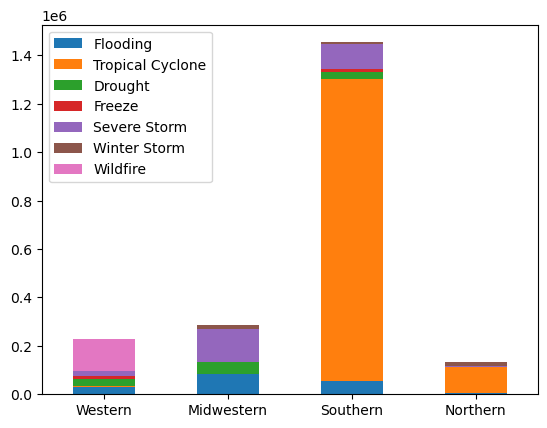

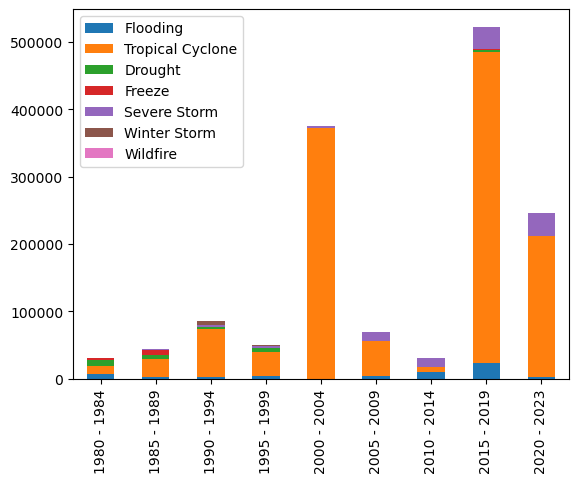

In [7]:
g.plot_dataframe(plottable_countrywide_cost, 0)

g.plot_dataframe(plottable_regions_cost["Southern"], 90)


### Implementation